# Accurary Line Graph

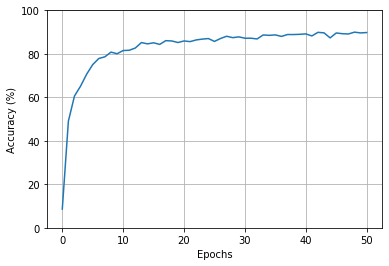

In [25]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("data/output.csv")
df = df[df["type"] == 1]
df['value1'] = df['value1'] * 100

plt.plot(df["epoch"], df["value1"], label = "GPU training")

plt.ylim([0, 100])
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()

# Bar Graphs

### Getting data

In [26]:
import pandas as pd
from matplotlib import pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

# GPU
df = pd.read_csv("data/output.csv")
df = df[df["type"] == 0]

# CPU
df1 = pd.read_csv("data/202206201415/cifar_resnet_buildin.csv")
df1 = df1[df1["type"] == 0]

# S3
df2 = pd.read_csv("data/s3output.csv")
df2 = df2[df2["type"] == 0]

### Individual loading and training time graphs

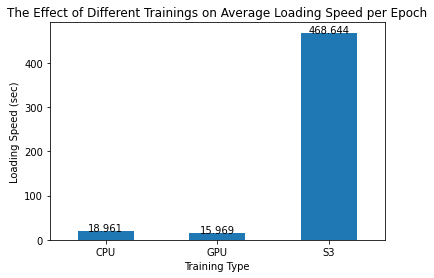

In [27]:
# Loading Time
plotdata = pd.DataFrame(
    {"times": [df1.iloc[-1]['loading'] / df1.iloc[-1]['epoch'], df.iloc[-1]['loading'] / df.iloc[-1]['epoch'], df2.iloc[-1]['loading'] / df2.iloc[-1]['epoch']]}, 
    index=["CPU", "GPU", "S3"])
xs = ["CPU", "GPU", "S3"]
ys = [round(df1.iloc[-1]['loading'] / df1.iloc[-1]['epoch'], 3), round(df.iloc[-1]['loading'] / df.iloc[-1]['epoch'], 3), round(df2.iloc[-1]['loading'] / df2.iloc[-1]['epoch'], 3)]

plotdata["times"].plot(kind = "bar")
plt.title("The Effect of Different Trainings on Average Loading Speed per Epoch")
plt.ylabel("Loading Speed (sec)")
plt.xlabel("Training Type")
plt.xticks(rotation=0, horizontalalignment="center")
addlabels(xs, ys)

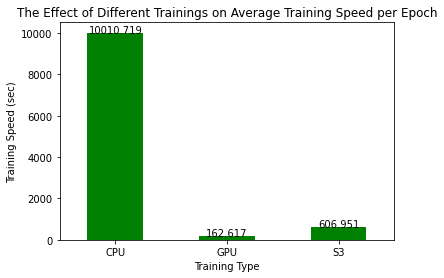

In [28]:
# Training Time
plotdata = pd.DataFrame(
    {"times": [df1.iloc[-1]['duration'] / df1.iloc[-1]['epoch'], df.iloc[-1]['duration'] / df.iloc[-1]['epoch'], df2.iloc[-1]['duration'] / df2.iloc[-1]['epoch']]}, 
    index=["CPU", "GPU", "S3"])
xs = ["CPU", "GPU", "S3"]
ys = [round(df1.iloc[-1]['duration'] / df1.iloc[-1]['epoch'], 3), round(df.iloc[-1]['duration'] / df.iloc[-1]['epoch'], 3), round(df2.iloc[-1]['duration'] / df2.iloc[-1]['epoch'], 3)]

plotdata["times"].plot(kind = "bar", color = "green")
plt.title("The Effect of Different Trainings on Average Training Speed per Epoch")
plt.ylabel("Training Speed (sec)")
plt.xlabel("Training Type")
plt.xticks(rotation=0, horizontalalignment="center")
addlabels(xs, ys)

### Stacked bar graph

Text(0, 0.5, 'Time (sec)')

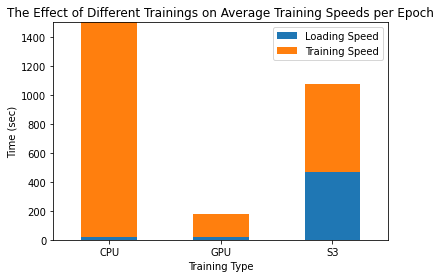

In [29]:
df3 = pd.DataFrame([['CPU', df1.iloc[-1]['loading'] / df1.iloc[-1]['epoch'], df1.iloc[-1]['duration'] / df1.iloc[-1]['epoch']], ['GPU', df.iloc[-1]['loading'] / df.iloc[-1]['epoch'], df.iloc[-1]['duration'] / df.iloc[-1]['epoch']], ['S3', df2.iloc[-1]['loading'] / df2.iloc[-1]['epoch'], df2.iloc[-1]['duration'] / df2.iloc[-1]['epoch']]],
                  columns=['Training Type', 'Loading Speed', 'Training Speed'])
df3.plot(x='Training Type', kind='bar', stacked=True,
        title='The Effect of Different Trainings on Average Training Speeds per Epoch')
plt.ylim(0, 1500)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Time (sec)")